## PS3

In [1]:
import numpy as np
import scipy.optimize as opt
import scipy.interpolate as intpl
import matplotlib.pyplot as plt
import scipy.optimize as opt

### Q1 (a-c)

In [8]:
# Setting up parameters
beta = 0.9
gamma = 2.2
W_min = 0.1
W_max = 10.0
W_size = 30

W_vec = np.linspace(W_min, W_max, W_size)

In [4]:
# Setting up preference shocks and probabilities
eps_vec = np.array([-1.40, -0.55, 0.0, 0.55, 1.40])
eps_prob = np.array([0.1, 0.2, 0.4, 0.2, 0.1])
eps_size = eps_vec.shape[0]

In [5]:
# Define the CRRA utility function
def util_CRRA(W, W_pr, gamma):
    c = W - W_pr
    util = (c ** (1 - gamma) - 1) / (1 - gamma)
    return util

# Define the negative value minimization function 
def neg_V_iid(W_pr, *args):
    W, eps, util, Exp_V_t_interp, gamma, beta = args
    Vtp1 = np.exp(eps) * util(W, W_pr, gamma) + beta * Exp_V_t_interp(W_pr)
    return -Vtp1

In [9]:
# Performing value function iteration
V_init = np.zeros((W_size, eps_size))
V_new = V_init.copy()

VF_iter = 0
VF_dist = 10
VF_maxiter = 200
VF_mindist = 1e-8

while (VF_iter < VF_maxiter) and (VF_dist > VF_mindist):
    VF_iter += 1
    V_init = V_new.copy()
    V_new = np.zeros((W_size, eps_size))
    psi_mat = np.zeros((W_size, eps_size))
    
    # Integrate out eps_pr from V_init
    Exp_V = V_init @ eps_prob.reshape((eps_size, 1))
    
    # Interpolate expected value function
    Exp_V_interp = intpl.interp1d(W_vec, Exp_V.flatten(), 
                                  kind="cubic", fill_value="extrapolate")
    for eps_ind in range(eps_size):
        for W_ind in range(W_size):
            W = W_vec[W_ind]
            eps = eps_vec[eps_ind]
            V_args = (W, eps, util_CRRA, Exp_V_interp, gamma, beta)
            results1 = opt.minimize_scalar(neg_V_iid, 
                                           bounds=(1e-10, W - 1e-10), 
                                           args=V_args, method="bounded")
            V_new[W_ind, eps_ind] = -results1.fun
            psi_mat[W_ind, eps_ind] = results1.x
    
    VF_dist = ((V_init - V_new) ** 2).sum()
    print("VF_iter = {}, VF_dist: {}.".format(VF_iter, VF_dist))

V_1 = V_new.copy()
psi_1 = psi_mat.copy()

VF_iter = 1, VF_dist: 3494.416552492849.
VF_iter = 2, VF_dist: 3288.9775602179398.
VF_iter = 3, VF_dist: 4368.033199294504.
VF_iter = 4, VF_dist: 5171.123172733101.
VF_iter = 5, VF_dist: 5690.816865389136.
VF_iter = 6, VF_dist: 5962.334129328164.
VF_iter = 7, VF_dist: 6029.41086344141.
VF_iter = 8, VF_dist: 5938.006359170563.
VF_iter = 9, VF_dist: 5728.733568262048.
VF_iter = 10, VF_dist: 5436.0895918287815.
VF_iter = 11, VF_dist: 5088.450567375282.
VF_iter = 12, VF_dist: 4708.595711208244.
VF_iter = 13, VF_dist: 4314.42587097833.
VF_iter = 14, VF_dist: 3919.652986508642.
VF_iter = 15, VF_dist: 3534.453890339967.
VF_iter = 16, VF_dist: 3166.071779909474.
VF_iter = 17, VF_dist: 2819.372405911818.
VF_iter = 18, VF_dist: 2497.3313722144326.
VF_iter = 19, VF_dist: 2201.4557625474285.
VF_iter = 20, VF_dist: 1932.139917895233.
VF_iter = 21, VF_dist: 1688.959663806459.
VF_iter = 22, VF_dist: 1470.9108719157214.
VF_iter = 23, VF_dist: 1276.5993702276612.
VF_iter = 24, VF_dist: 1104.38931597387

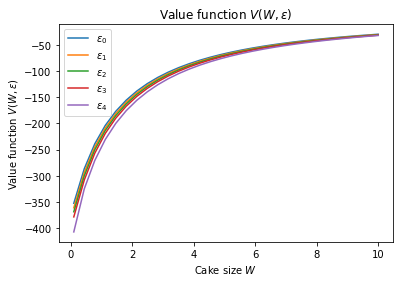

In [10]:
# Plotting resulting value functions
for eps_ind in range(eps_size): 
    plt.plot(W_vec, V_1[:, eps_ind], label=f'$\epsilon_{eps_ind}$')
plt.title('Value function $V(W,\epsilon)$')
plt.xlabel(r'Cake size $W$')
plt.ylabel(r'Value function $V(W,\epsilon)$')
plt.legend()

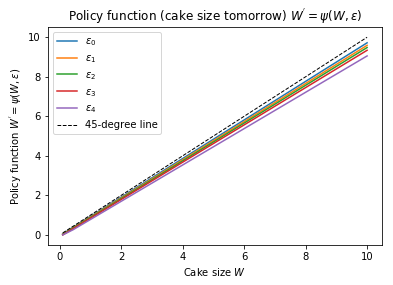

In [14]:
# Plotting resulting policy function
for eps_ind in range(eps_size): 
    plt.plot(W_vec, psi_1[:, eps_ind], label=f'$\epsilon_{eps_ind}$')
plt.plot(W_vec, W_vec, color='black', linewidth=1, linestyle='--',
         label='45-degree line')
plt.title('Policy function (cake size tomorrow) ' +
          '$W^{\'}=\psi(W,\epsilon)$')
plt.xlabel('Cake size $W$')
plt.ylabel('Policy function $W^{\'}=\psi(W,\epsilon)$')
plt.legend()

### Q2 (a-c)

In [15]:
# Setting up parameters
W_min = 0.1
W_max = 10.0
W_size = 30
W_vec = np.linspace(W_min, W_max, W_size)

In [16]:
# Setting preference shocks and probabilities
eps_vec = np.array([-1.40, -0.55, 0.0, 0.55, 1.4])

trans_mat = np.array([
    [0.40, 0.28, 0.18, 0.10, 0.04],
    [0.20, 0.40, 0.20, 0.13, 0.07],
    [0.10, 0.20, 0.40, 0.20, 0.10],
    [0.07, 0.13, 0.20, 0.40, 0.20],
    [0.04, 0.10, 0.18, 0.28, 0.40]
])

In [17]:
#Performing value function iteration
V_init = np.zeros((W_size, eps_size))
V_new = V_init.copy()

VF_iter = 0
VF_dist = 10
VF_maxiter = 200
VF_mindist = 1e-8

while (VF_iter < VF_maxiter) and (VF_dist > VF_mindist):
    VF_iter += 1
    V_init = V_new.copy()
    V_new = np.zeros((W_size, eps_size))
    psi_mat = np.zeros((W_size, eps_size))
    
    for eps_ind in range(eps_size):
        # Calculate expected value and integrate out epsilon prime
        trans_mat_ind = trans_mat[eps_ind, :]
        Exp_V = V_init @ trans_mat_ind.reshape((eps_size, 1))
        
        # Interpolate expected value function
        Exp_V_interp = intpl.interp1d(W_vec, Exp_V.flatten(), kind="cubic", fill_value="extrapolate")
        for W_ind in range(W_size):
            W = W_vec[W_ind]
            eps = eps_vec[eps_ind]
            V_args = (W, eps, util_CRRA, Exp_V_interp, gamma, beta)
            results1 = opt.minimize_scalar(neg_V_iid, bounds=(1e-10, W - 1e-10), args=V_args, method="bounded")
            V_new[W_ind, eps_ind] = -results1.fun
            psi_mat[W_ind, eps_ind] = results1.x
        
    VF_dist = ((V_init - V_new) ** 2).sum()
    print("VF_iter = {}, VF_dist: {}.".format(VF_iter, VF_dist))

V_2 = V_new.copy()
psi_2 = psi_mat.copy()

VF_iter = 1, VF_dist: 3494.416552492849.
VF_iter = 2, VF_dist: 4874.985394413625.
VF_iter = 3, VF_dist: 5656.12392067181.
VF_iter = 4, VF_dist: 6339.326577448595.
VF_iter = 5, VF_dist: 6784.605125207152.
VF_iter = 6, VF_dist: 6985.799159895719.
VF_iter = 7, VF_dist: 6981.428377619093.
VF_iter = 8, VF_dist: 6816.840486149348.
VF_iter = 9, VF_dist: 6534.059682039732.
VF_iter = 10, VF_dist: 6169.1406209651595.
VF_iter = 11, VF_dist: 5751.815350888653.
VF_iter = 12, VF_dist: 5305.887715703938.
VF_iter = 13, VF_dist: 4849.904814536487.
VF_iter = 14, VF_dist: 4397.907932627253.
VF_iter = 15, VF_dist: 3960.1652494133828.
VF_iter = 16, VF_dist: 3543.85529104669.
VF_iter = 17, VF_dist: 3153.675483894017.
VF_iter = 18, VF_dist: 2792.370835769743.
VF_iter = 19, VF_dist: 2461.183446082481.
VF_iter = 20, VF_dist: 2160.226185380095.
VF_iter = 21, VF_dist: 1888.7889925604807.
VF_iter = 22, VF_dist: 1645.5852440447054.
VF_iter = 23, VF_dist: 1428.946962620197.
VF_iter = 24, VF_dist: 1236.9765071679012

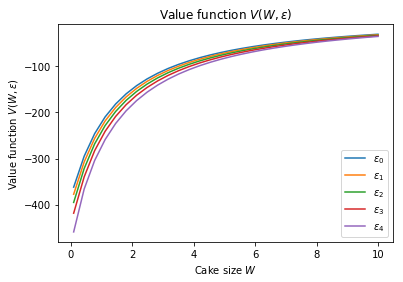

In [18]:
# Plotting resulting value functions
for eps_ind in range(eps_size): 
    plt.plot(W_vec, V_2[:, eps_ind], label=f'$\epsilon_{eps_ind}$')
plt.title('Value function $V(W,\epsilon)$')
plt.xlabel(r'Cake size $W$')
plt.ylabel(r'Value function $V(W,\epsilon)$')
plt.legend()

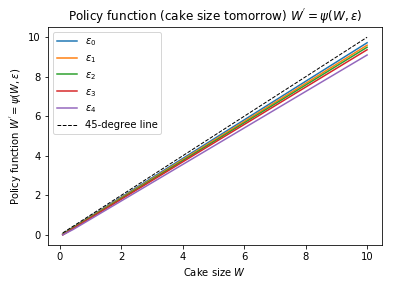

In [20]:
# Plotting resulting policy functions
for eps_ind in range(eps_size): 
    plt.plot(W_vec, psi_2[:, eps_ind], label=f'$\epsilon_{eps_ind}$')
plt.plot(W_vec, W_vec, color='black', linewidth=1, linestyle='--',
         label='45-degree line')
plt.title('Policy function (cake size tomorrow) ' +
          '$W^{\'}=\psi(W,\epsilon)$')
plt.xlabel('Cake size $W$')
plt.ylabel('Policy function $W^{\'}=\psi(W,\epsilon)$')
plt.legend()